<a href="https://colab.research.google.com/github/ShreyaBage/Data-Science-Projects/blob/main/Model_Interpretability_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Model_Interpretability***

*Explaination of Dataset*

The Red Wine Quality dataset is a dataset commonly used for regression tasks in machine learning. It contains various physicochemical properties of red wines along with a quality rating. Here's a brief overview:

Origin: The dataset is derived from a study published by P. Cortez et al. titled "Modeling wine preferences by data mining from physicochemical properties."

Features (Input Variables):

Fixed acidity
Volatile acidity
Citric acid
Residual sugar
Chlorides
Free sulfur dioxide
Total sulfur dioxide
Density
pH
Sulphates
Alcohol
Target Variable (Output Variable):

Quality (rated on a scale from 3 to 8, where higher values indicate better quality)
Number of Instances: Typically around 1,599 instances.

Task: The task associated with this dataset is regression. Given the features (physicochemical properties), the goal is to predict the quality rating of red wines.

Use Cases: Commonly used for regression modeling, exploring feature importance, and understanding the relationship between wine characteristics and quality.

Data Format: Often available as a CSV file.






In [ ]:
pip install pandas scikit-learn shap

In [ ]:
import pandas as pd

# Load the Red Wine Quality dataset
df1 = pd.read_csv('winequality-red.csv')

# List of columns to exclude
columns_to_exclude = ['fixed_acidity','total_sulfur_dioxide','chlorides','citric_acid','pH']  # Replace with the actual column names you want to exclude

# Method 1: Using drop for column exclusion
df_excluded_columns = df1.drop(columns=columns_to_exclude, axis=1)

# Method 2: Selecting columns to keep
columns_to_keep = [col for col in df1.columns if col not in columns_to_exclude]
df_excluded_columns = df1[columns_to_keep]

# Selecting only 400 rows
df = df_excluded_columns.head(400)

# Display the resulting DataFrame
print(df.head())

   volatile_acidity  residual_sugar  free_sulfur_dioxide  density  sulphates  \
0              0.70             1.9                 11.0   0.9978       0.56   
1              0.88             2.6                 25.0   0.9968       0.68   
2              0.76             2.3                 15.0   0.9970       0.65   
3              0.28             1.9                 17.0   0.9980       0.58   
4              0.70             1.9                 11.0   0.9978       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5  


Creates a SHAP TreeExplainer for the linear regression model.
Calculates SHAP values for the test set.Generates a summary plot using SHAP values to visualize the impact of each feature on model predictions. This code demonstrates the process of training a linear regression model, evaluating its performance, and using SHAP values for interpretability. The SHAP summary plot helps understand the contribution of each feature to the model's predictions.

Interpretation of SHAP summary plot:

Horizontal Bars:

Each horizontal bar in the plot represents a feature.
The length of the bar represents the magnitude of the Shapley values for that feature. Longer bars indicate a larger impact on the model's output.

Color Gradient:

The color of the dot on each bar represents the value of the corresponding feature for that instance. Darker colors usually indicate higher feature values.

Right of Vertical Line (Positive Shapley Values): Features that push the model's output higher.
Left of Vertical Line (Negative Shapley Values): Features that push the model's output lower.
Length of Bars: Indicates the magnitude of the impact.

Mean Squared Error: 0.3453075906827473


  0%|          | 0/80 [00:00<?, ?it/s]

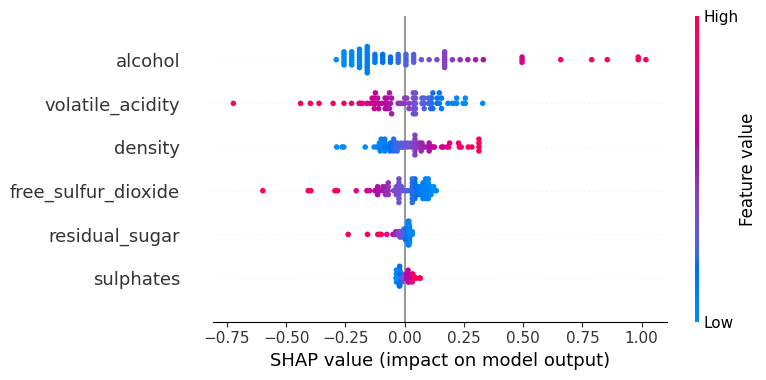

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import shap


# Assume 'quality' is the target variable
X = df.drop('quality', axis=1)
y = df['quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Use KernelExplainer for interpreting the model with SHAP
explainer = shap.KernelExplainer(model.predict, X_train)
shap_values = explainer.shap_values(X_test)

# Summarize the effects of all the features
shap.summary_plot(shap_values, X_test)

Creates a SHAP KernelExplainer using the linear regression model and the training data.
Computes SHAP values (shap_values) for the test set.Generates a SHAP summary plot to visualize the impact of each feature on the model's predictions for the test set

The MSE value provides a measure of the average squared difference between the predicted and actual values. A lower MSE indicates better model performance.

In your case, with a MSE of 0.3453, it suggests that, on average, the squared difference between the predicted and actual wine quality values is relatively low. This is a positive indication of the model's accuracy in predicting wine quality based on the features used.

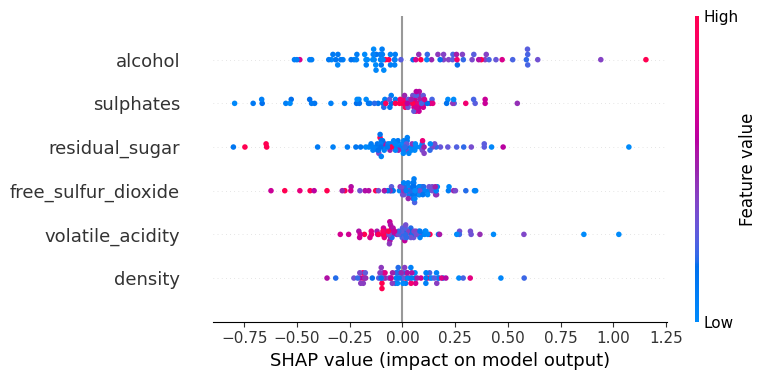

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import shap

# Assume 'quality' is the target variable
X = df.drop('quality', axis=1)
y = df['quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a decision tree model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Use TreeExplainer for interpreting the model with SHAP
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Summarize the effects of all the features
shap.summary_plot(shap_values, X_test)

This code helps interpret the decision tree model by providing insights into how each feature contributes to individual predictions. The summary plot shows the average magnitude and direction of the SHAP values for each feature, helping understand the model's behavior.

Mean Squared Error: 0.4723164722265551


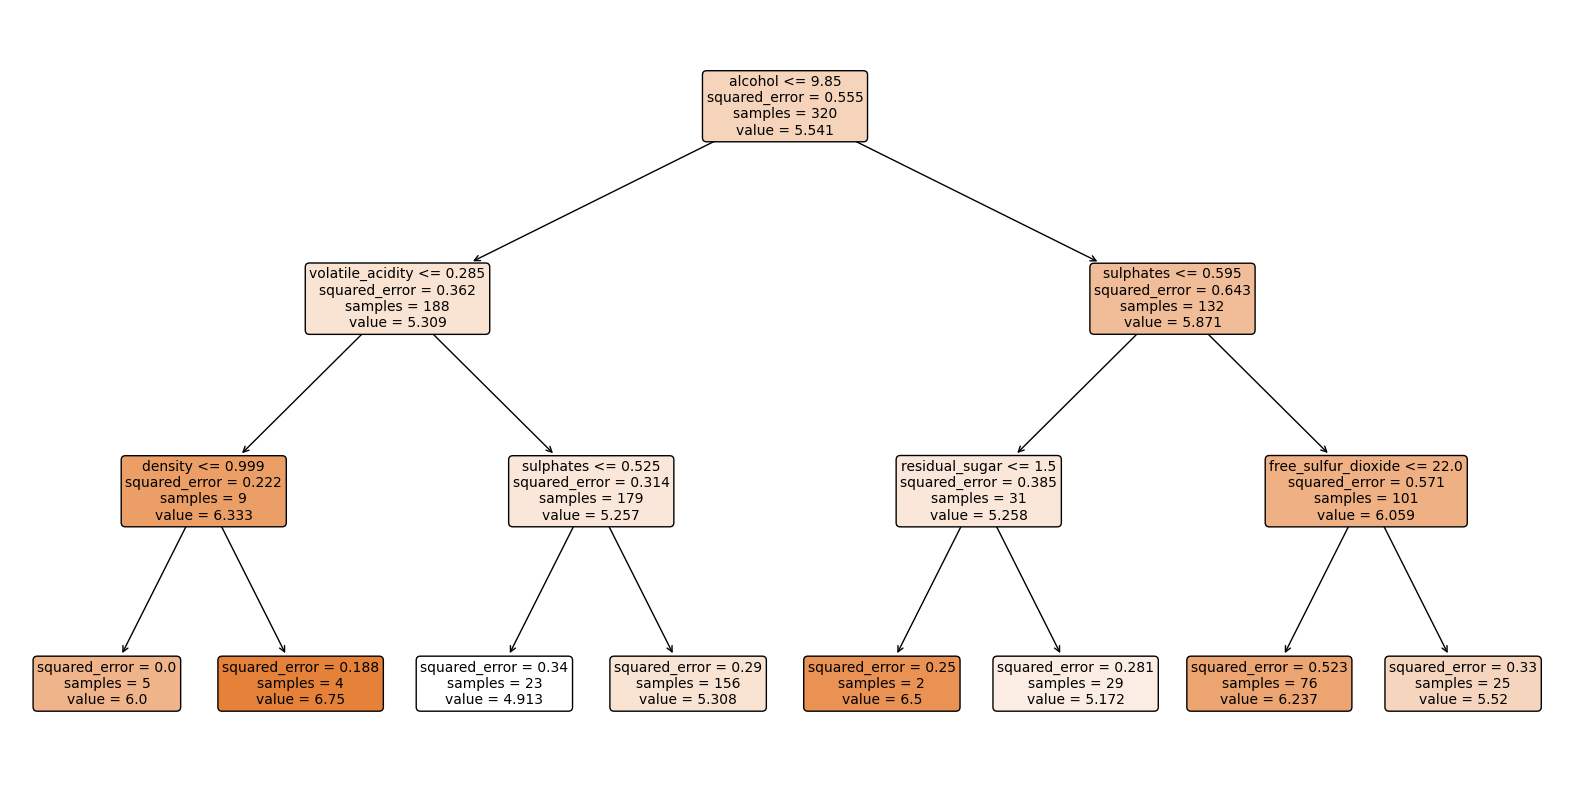

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt



# Assume 'quality' is the target variable
X = df.drop('quality', axis=1)
y = df['quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a decision tree model
model = DecisionTreeRegressor(max_depth=3,random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Visualize the decision tree (optional)
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, filled=True, rounded=True, fontsize=10)
plt.show()


***Decision tree Analysis***

Features higher in the tree are more influential in making decisions such as alcohol then volatile_acidity and sulphates. Nodes with lower impurity indicate more pure subsets.
The squared error in a decision tree is a measure of how well a node can predict the target variable, and the algorithm aims to minimize this error when constructing the tree.
"Samples" refer to the number of data points that reach a particular node during the construction of the decision tree.For the root node, it represents the total number of samples in the entire dataset.At each internal node (non-leaf node), it represents the number of samples that satisfy the condition specified by the node's splitting criterion.
"Value" represents the distribution of the target variable (class labels or regression values) for the samples in a node.
For a classification tree, it shows the count of samples in each class.

In [ ]:
!pip install tpot
import pandas as pd
from sklearn.model_selection import train_test_split
from tpot import TPOTRegressor



# Assume 'quality' is the target variable
X = df.drop('quality', axis=1)
y = df['quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use TPOT for automated machine learning
tpot = TPOTRegressor(
    generations=5,  # Number of generations to run the optimization process
    population_size=20,  # Number of individuals in the population
    random_state=42,
    verbosity=2,  # Controls the amount of information TPOT prints
    n_jobs=-1  # Use all available CPUs for faster processing
)

# Fit the TPOTRegressor on the training data
tpot.fit(X_train, y_train)

# Print the best pipeline and its performance
print(tpot.fitted_pipeline_)
print("Best pipeline test score: {:.4f}".format(tpot.score(X_test, y_test)))

# Export the best pipeline to a Python script (optional)
tpot.export('best_model_pipeline.py')

Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.3911835237407083

Generation 2 - Current best internal CV score: -0.3862343372842329

Generation 3 - Current best internal CV score: -0.3643068995326252

Generation 4 - Current best internal CV score: -0.3643068995326252

Generation 5 - Current best internal CV score: -0.3643068995326252

Best pipeline: RandomForestRegressor(input_matrix, bootstrap=False, max_features=0.2, min_samples_leaf=3, min_samples_split=8, n_estimators=100)
Pipeline(steps=[('randomforestregressor',
                 RandomForestRegressor(bootstrap=False, max_features=0.2,
                                       min_samples_leaf=3, min_samples_split=8,
                                       random_state=42))])
Best pipeline test score: -0.2979


Interpretation of Results:

The results show the performance of different generations during the TPOT optimization process.
Each generation represents a set of candidate models and their performance on the cross-validated dataset.
Current Best Internal CV Score:

This score represents the cross-validated performance (CV) metric used internally by TPOT to evaluate the models.
It helps TPOT select the best-performing models for the next generation.
Best Pipeline:

The best pipeline is the model configuration that achieved the best internal CV score.
In this case, it's a RandomForestRegressor with specific hyperparameters:
bootstrap is set to False
max_features is set to 0.2
min_samples_leaf is set to 3
min_samples_split is set to 8
n_estimators is set to 100
Best Pipeline Test Score:

This score represents the performance of the best pipeline on a separate test dataset.
It's a measure of how well the selected model generalizes to new, unseen data.
Pipeline Steps:

The detailed steps of the best pipeline are provided. In this case, it's a RandomForestRegressor with the specified hyperparameters.
Overall, it seems like the TPOT optimization process has identified a RandomForestRegressor with specific hyperparameters as the best-performing model for your dataset. The test score of approximately -0.2979 suggests good performance, but the interpretation of this score depends on the specific metric used and the nature of your regression problem (lower scores are generally better).

Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.3911835237407083

Generation 2 - Current best internal CV score: -0.3862343372842329

Generation 3 - Current best internal CV score: -0.3643068995326252

Generation 4 - Current best internal CV score: -0.3643068995326252

Generation 5 - Current best internal CV score: -0.3643068995326252

Best pipeline: RandomForestRegressor(input_matrix, bootstrap=False, max_features=0.2, min_samples_leaf=3, min_samples_split=8, n_estimators=100)


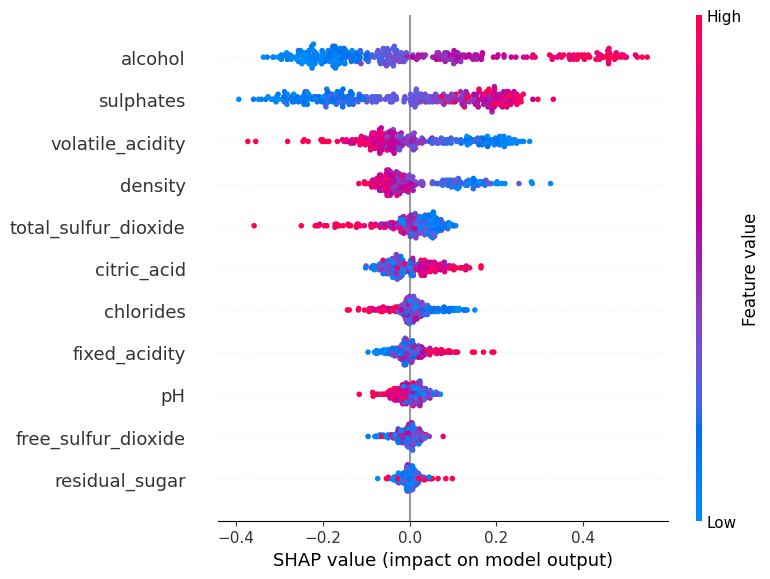

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tpot import TPOTRegressor
from sklearn.ensemble import RandomForestRegressor
import shap


# Assume 'quality' is the target variable
X = df.drop('quality', axis=1)
y = df['quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Run TPOT to find the best model
tpot = TPOTRegressor(generations=5, population_size=20, random_state=42, verbosity=2)
tpot.fit(X_train, y_train)

# Get the best pipeline and extract the RandomForestRegressor
best_model = tpot.fitted_pipeline_
random_forest_model = best_model.named_steps['randomforestregressor']

# Interpret the RandomForestRegressor using SHAP values
explainer = shap.TreeExplainer(random_forest_model)
shap_values = explainer.shap_values(X_test)

# Summarize the effects of all the features
shap.summary_plot(shap_values, X_test)



Each generation corresponds to a set of candidate machine learning models evaluated during the TPOT optimization process.
The internal cross-validated (CV) score is a measure of their performance.
Current Best Internal CV Score:

This score represents the best cross-validated performance achieved by the models in the current generation.
It is an evaluation metric used internally by TPOT to guide the optimization process.
Best Pipeline:

The "best pipeline" refers to the configuration of the machine learning model that achieved the best internal CV score.
In this case, the best pipeline is a RandomForestRegressor with specific hyperparameters:
bootstrap set to False
max_features set to 0.2
min_samples_leaf set to 3
min_samples_split set to 8
n_estimators set to 100
This information suggests that TPOT has identified a RandomForestRegressor with these hyperparameters as the best-performing model according to the internal cross-validated score. The model is configured to use a bootstrap aggregation method (bootstrap=False) and includes additional specifications for controlling tree growth (max_features, min_samples_leaf, min_samples_split, and n_estimators). The identified pipeline is a candidate for the final model to be used on new, unseen data.








Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.3911835237407083

Generation 2 - Current best internal CV score: -0.3862343372842329

Generation 3 - Current best internal CV score: -0.3643068995326252

Generation 4 - Current best internal CV score: -0.3643068995326252

Generation 5 - Current best internal CV score: -0.3643068995326252

Best pipeline: RandomForestRegressor(input_matrix, bootstrap=False, max_features=0.2, min_samples_leaf=3, min_samples_split=8, n_estimators=100)


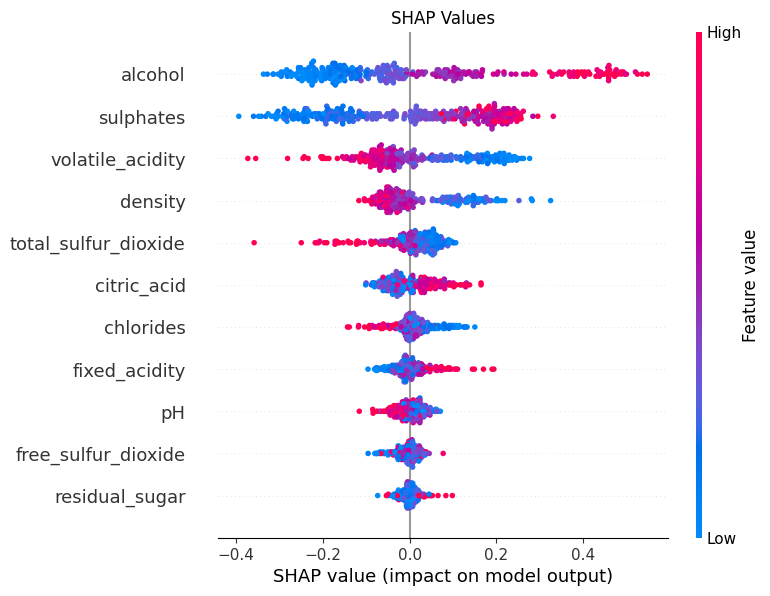

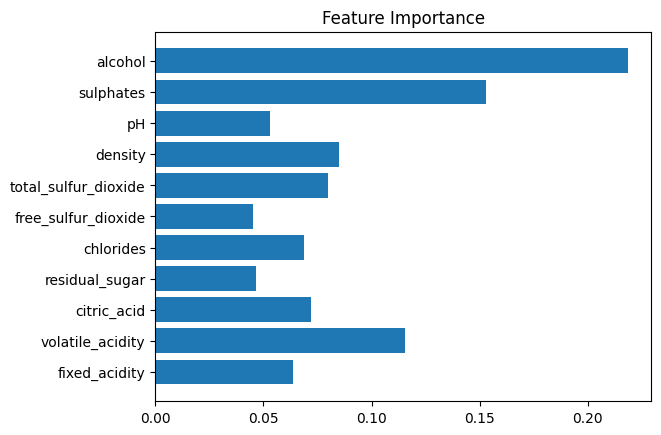

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tpot import TPOTRegressor
from sklearn.ensemble import RandomForestRegressor
import shap
import matplotlib.pyplot as plt



# Assume 'quality' is the target variable
X = df.drop('quality', axis=1)
y = df['quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Run TPOT to find the best model
tpot = TPOTRegressor(generations=5, population_size=20, random_state=42, verbosity=2)
tpot.fit(X_train, y_train)

# Get the best pipeline and extract the RandomForestRegressor
best_model = tpot.fitted_pipeline_
random_forest_model = best_model.named_steps['randomforestregressor']

# Interpret the RandomForestRegressor using SHAP values
explainer = shap.TreeExplainer(random_forest_model)
shap_values = explainer.shap_values(X_test)

# Compare SHAP values with Feature Importance
# 1. SHAP Summary Plot
shap.summary_plot(shap_values, X_test, feature_names=X.columns, show=False)
plt.title("SHAP Values")

# 2. Feature Importance Plot
plt.figure()
plt.barh(X.columns, random_forest_model.feature_importances_)
plt.title("Feature Importance")

plt.show()

The provided code uses TPOT to search for the best machine learning model, and then interprets the RandomForestRegressor model using SHAP (SHapley Additive exPlanations) values. It also compares the SHAP values with the feature importance calculated by the RandomForestRegressor.

***Which model is better***


Decision trees inherently capture feature interactions, while linear regression assumes independence between features.Examine whether the decision tree model assigns significant SHAP values to feature interactions.Feature interactions captured by the decision tree but missed by the linear regression model may indicate areas where the decision tree outperforms the linear model.

***Conclusion***

Here are some scenarios where decision tree models might be particularly well-suited:

Non-Linear Relationships:

Decision trees are effective at capturing non-linear relationships in the data. If the underlying patterns are non-linear or involve complex interactions between features, a decision tree may outperform linear models.
Feature Interactions:

Decision trees naturally capture feature interactions. If there are important interactions between variables that affect the target variable, a decision tree can model these relationships more effectively than linear models.
Categorical Features:

Decision trees handle categorical features well without the need for one-hot encoding. If your dataset includes categorical variables, decision trees can handle them directly.
Interpretability Requirements:

Decision trees provide a clear and interpretable decision-making process. If interpretability is crucial for your application or if you need to explain model predictions to stakeholders, decision trees offer a transparent way to understand how decisions are made.
Data with Irregular Boundaries:

Decision trees can create complex decision boundaries, making them suitable for datasets with irregular shapes. In contrast to linear models, decision trees are not restricted to linear decision boundaries.
Mixed Data Types:

Decision trees can handle a mix of numerical and categorical features without requiring extensive preprocessing. This flexibility is beneficial when working with diverse datasets.
Outliers:

Decision trees are less sensitive to outliers compared to some other models. Outliers may not heavily impact the performance of a decision tree.
Ensemble Methods:

Decision trees can be used as building blocks for ensemble methods like Random Forests or Gradient Boosting. Ensemble methods combine multiple decision trees to improve predictive performance and generalization.